**Meramalkan Perubahan Inflasi Pada Tahun 2020 Setiap Bulannya** ~ Main Project Rahmawati Masithoh G5501211007

In [1]:
using XLSX
using DataFrames
using BenchmarkTools
using Plots
using LinearAlgebra
using StatsPlots

**Untuk melakukan peramalan, gunakan data deret waktu. Oleh karena itu, berikut ini hasil data yang telah diurutkan**

In [21]:
df = DataFrame(XLSX.readtable("df.xlsx","Sheet1")...)

,Tahun,Bahan Makanan,"Makanan Jadi, Minuman, Rokok, dan Tembakau","Perumahan, Air, Listrik, Gas, dan Bahan Bakar"
,Any,Any,Any,Any
1,200001,2.93,0.36,0.47
2,200002,-0.33,0.08,0.47
3,200003,-2.28,-0.09,0.42
4,200004,-1.6,2.41,1.17
5,200005,-0.03,-0.09,1.84
6,200006,0.16,0.97,0.4
7,200007,2,0.97,0.68
8,200008,-1.87,0.86,-0.37
9,200009,-2.4,0.56,0.69


In [22]:
names(df)

9-element Vector{String}:
 "Tahun"
 "Bahan Makanan"
 "Makanan Jadi, Minuman, Rokok, dan Tembakau"
 "Perumahan, Air, Listrik, Gas, dan Bahan Bakar"
 "Sandang"
 "Kesehatan"
 "Pendidikan, Rekreasi, dan Olahraga"
 "Transportasi, Komunikasi, dan Jasa Keuangan"
 "Umum"

**Mendefinisikan index data sebagai sumbu -x**

In [48]:
x=rownumber.(eachrow(df))

240-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 229
 230
 231
 232
 233
 234
 235
 236
 237
 238
 239
 240

In [24]:
bm=df[:,2]
mj=df[:,3]
rt=df[:,4]
san=df[:,5]
kes=df[:,6]
pro=df[:,7]
tkj=df[:,8]
um=df[:,9]

240-element Vector{Any}:
  1.32
  0.07
  0.45
  0.56
  0.84
  0.5
  1.28
  0.51
 -0.06
  1.16
  1.32
  1.94
  0.33
  ⋮
  0.32
 -0.08
  0.11
  0.44
  0.68
  0.55
  0.31
  0.12
 -0.27
  0.02
  0.14
  0.34

**Memplotting data inflasi berdasarkan jenis-jenisnya**

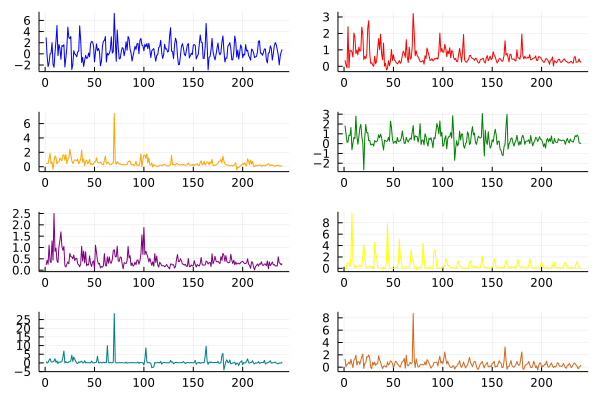

In [25]:
a=plot(x,bm,label="Bahan Makanan",color =:blue)
b=plot(x,mj,label="Makanan Jadi, Minuman, Rokok, dan Tembakau",color =:red)
c=plot(x,rt,label="Perumahan, Air, Listrik, Gas, dan Bahan Bakar",color =:orange)
d=plot(x,san,label="Sandang",color =:green)
e=plot(x,kes,label="Kesehatan",color =:purple)
f=plot(x,pro,label="Pendidikan, Rekreasi, dan Olahraga",color =:yellow)
g=plot(x,tkj,label="Transportasi, Komunikasi, dan Jasa Keuangan",color =:teal)
h=plot(x,um,label="Umum",color =:chocolate)
plot(a,b,c,d,e,f,g,h, layout = (4, 2), legend = false)

**Memplotting data inflasi menggunakan visualisasi violin berdasarkan jenis-jenisnya**

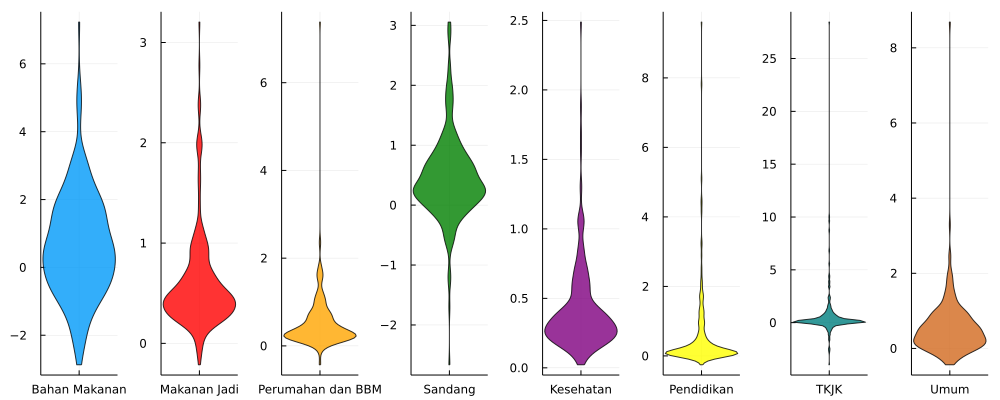

In [26]:
va=violin(["Bahan Makanan"], bm,legend=false,alpha=0.8)
vb=violin(["Makanan Jadi"], mj,legend=false,alpha=0.8,color =:red)
vc=violin(["Perumahan dan BBM"], rt,legend=false,alpha=0.8,color =:orange)
vd=violin(["Sandang"], san,legend=false,alpha=0.8,color =:green)
ve=violin(["Kesehatan"], kes,legend=false,alpha=0.8,color =:purple)
vf=violin(["Pendidikan"], pro,legend=false,alpha=0.8,color =:yellow)
vg=violin(["TKJK"], tkj,legend=false,alpha=0.8,color =:teal)
vh=violin(["Umum"], um,legend=false,alpha=0.8,color =:chocolate)
plot(va,vb,vc,vd,ve,vf,vg,vh, layout = (1, 8), legend = false, size=(1000,400))

**Mendeskripsikan data inflasi**

In [27]:
describe(df)

,variable,mean,min,median,max
,Symbol,Float64,Real,Float64,Real
1,Tahun,2.00956e5,200001,2.00956e5,201912
2,Bahan Makanan,0.636875,-2.88,0.495,7.24
3,"Makanan Jadi, Minuman, Rokok, dan Tembakau",0.600292,-0.22,0.46,3.21
4,"Perumahan, Air, Listrik, Gas, dan Bahan Bakar",0.517875,-0.45,0.345,7.4
5,Sandang,0.4475,-2.68,0.35,3.07
6,Kesehatan,0.412583,0.01,0.32,2.5
7,"Pendidikan, Rekreasi, dan Olahraga",0.5395,-0.28,0.13,9.63
8,"Transportasi, Komunikasi, dan Jasa Keuangan",0.567333,-4.04,0.145,28.5
9,Umum,0.5505,-0.45,0.44,8.7


*Langkah awal sebelum melakukan peramalan adalah melihat pergerakkan data dengan cara mem-plotting data*

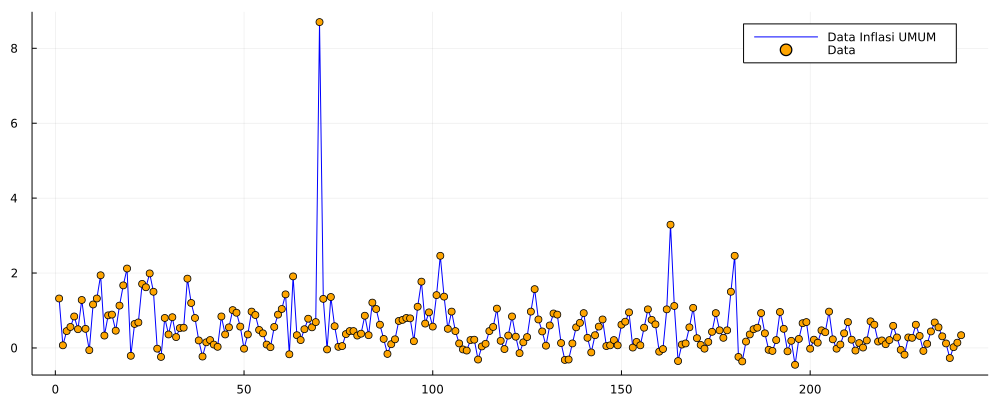

In [28]:
plot(x,um,label="Data Inflasi UMUM",color =:blue,size=(1000,400))
scatter!(x,um,label="Data",color =:orange,size=(1000,400))

*Berdasarkan hasil plotting, dapat dilihat data memiliki pola musiman setiap 6 bulan. Oleh karena itu, perlu menggunakan metode Holt-WInter untuk mengatasi pola musiman tersebut*

**Berikut pendefinisian fungsi metode Holt-Winter**

In [29]:
function HW_Seasonal(time_serie, α, β, γ, l0, b0, s0, m)
    N = length(time_serie)
    l_t = 0
    b_t = 0
    l_t_ = 0 #Variable to save l(t-1)
    b_t_ = 0 #Variable to save b(t-1)
    s_ = 0
    s = s0
    
    pred = []

    for i in 0:(N - 1)
        if i == 0
            l_t = l0
            b_t = b0
        else
            l_t = (time_serie[i] - s_) * α + (l_t_ + b_t_) * (1 - α) 
            b_t = β * (l_t - l_t_) + (1 - β) * b_t_
        end
        l_t_ = l_t
        b_t_ = b_t
        s_ = s[i%m + 1]
        
        y_pred = l_t + b_t + s[i%m + 1]
        
        push!(pred, y_pred)
        
        s[i%m + 1] = γ * (time_serie[i + 1] - l_t_ - b_t_) + (1 - γ) * s[i%m + 1]   
    end
    
    return pred
end

HW_Seasonal (generic function with 1 method)

**Menentukan nilai awal dari pemulusan-pemulusan pada metode Holt Winters.**

In [46]:
m = 6
l0 = round.((1/m)*sum(um[1:m]), digits=2)
b0 = round.((1/m^2)*(sum(um[m+1:m+m])-sum(um[1:m])), digits=2)
s0 = round.([((um[i])-l0) for i in 1:m], digits=2)
println("Nilai awal pemulusan keseluruhan = $l0.")
println("Nilai awal pemulusan tren = $b0.")
println("Nilai awal pemulusan musiman = $s0")

Nilai awal pemulusan keseluruhan = 0.62.
Nilai awal pemulusan tren = 0.07.
Nilai awal pemulusan musiman = [0.7, -0.55, -0.17, -0.06, 0.22, -0.12]


**Berikut melakukan data fit serta melihat seberapa besar perbedaan antara data fit dengan data aktual menggunakan ukuran kesalahan MAPE**

Besar kesalahan dalam peramalan inflasi untuk katergori umum adalah 269.99% yang artinya hasil ramalan kurang akurat


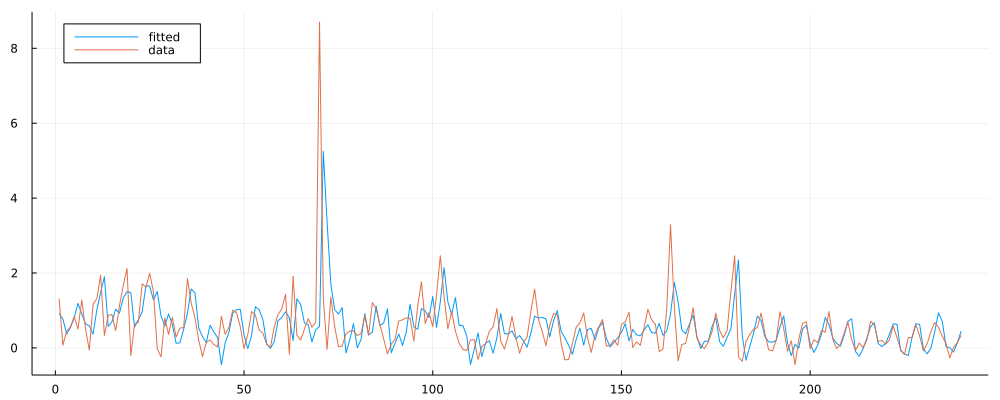

In [49]:
α = 0.515
β = 0.035
γ = 0.0825
sfit = HW_Seasonal(um, α, β, γ, l0, b0, s0, m)
error=[abs((um[i]-sfit[i])/um[i]) for i in 1:length(um)]
MAPE=round.((1/length(um))*sum(error)*100, digits=2)
if MAPE<=25
    println("Besar kesalahan dalam peramalan inflasi untuk katergori umum adalah $MAPE% yang artinya hasil ramalan sangat akurat")
elseif MAPE<=50
    println("Besar kesalahan dalam peramalan inflasi untuk katergori umum adalah $MAPE% yang artinya hasil ramalan akurat")
elseif MAPE<=75
    println("Besar kesalahan dalam peramalan inflasi untuk katergori umum adalah $MAPE% yang artinya hasil ramalan cukup akurat")
else
    println("Besar kesalahan dalam peramalan inflasi untuk katergori umum adalah $MAPE% yang artinya hasil ramalan kurang akurat")
end
plot(x, sfit, label = "fitted", size=(1000,400))
plot!(x, um, label = "data", legend=:topleft,size=(1000,400))

*diperoleh hasil data fit dengan kesalahan sebesar 269,99% yang artinya data fit tidak akurat*

**Selanjutnya, melakukan peramalan untuk 12 data berikutnya atau ramalan inflasi di tahun 2020**

Hasil ramalan inflasi kategori umum di tahun 2021 adalah 
    [0.35, -0.08, -0.19, -0.13, 0.04, 0.34, 0.31, -0.12, -0.23, -0.17, -0.0, 0.29] 
    dengan besar kesalahan 269.99%


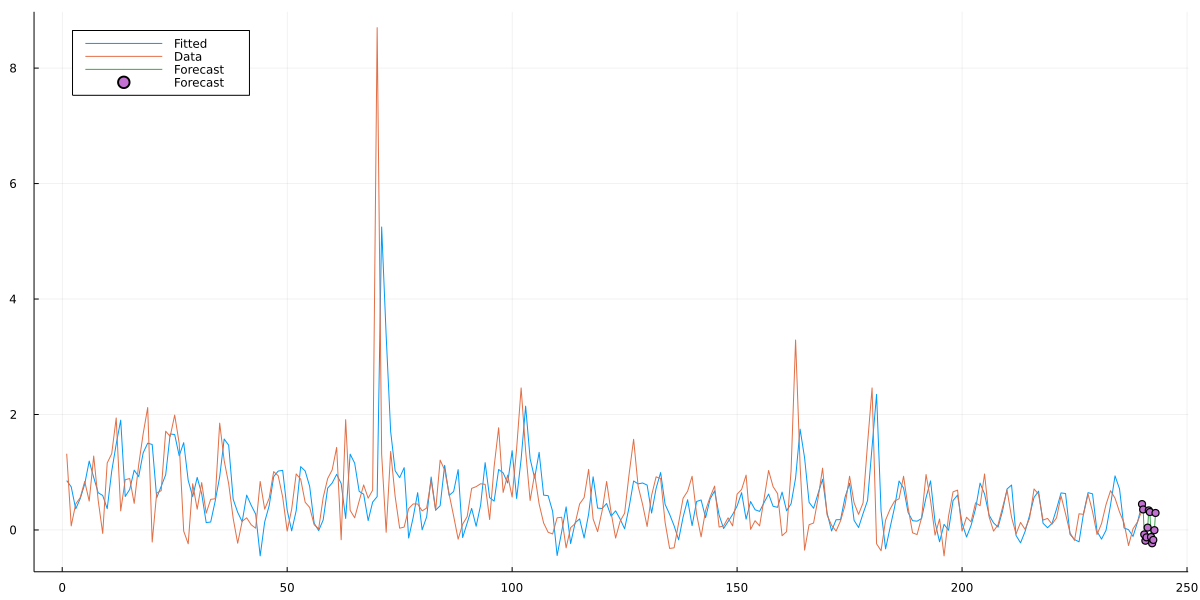

In [50]:
function HW_Seasonal_forecast(time_serie, α, β, γ, l0, b0, s0, m, n_pred)
    N = length(time_serie)
    l_t = 0
    b_t = 0
    l_t_ = 0 #Variable to save l(t-1)
    b_t_ = 0 #Variable to save b(t-1)
    s_ = 0
    s = s0
    
    pred = []

    for i in 0:(N - 1)
        if i == 0
            l_t = l0
            b_t = b0
        else
            l_t = (time_serie[i] - s_) * α + (l_t_ + b_t_) * (1 - α) 
            b_t = β * (l_t - l_t_) + (1 - β) * b_t_
        end
        l_t_ = l_t
        b_t_ = b_t
        s_ = s[i%m + 1]
        
        y_pred = l_t + b_t + s[i%m + 1]
        
        push!(pred, y_pred)
        
        s[i%m + 1] = γ * (time_serie[i + 1] - l_t_ - b_t_) + (1 - γ) * s[i%m + 1]   
    end
    
    l_t = (time_serie[end] - s_) * α + (l_t + b_t) * (1 - α)
    b_t = β * (l_t - l_t_) + (1 - β) * b_t_
    
    for i in N:(N+n_pred - 1) #sino hace una pred de mas
        y_pred = l_t + b_t*(i-N+1) + s[i%m + 1] 
        #The trend has to be added as many times as periods we want to forecast.
        push!(pred, y_pred)
    end 
    
    return pred
end
sfore = HW_Seasonal_forecast(um, α, β, γ, l0, b0, s0, m, 12)
sf=round.(sfore[241:252], digits=2)
println("Hasil ramalan inflasi kategori umum di tahun 2021 adalah 
    $sf 
    dengan besar kesalahan $MAPE%")
plot(x, sfore[1:240], label="Fitted", size=(1000,400))
plot!(x, um, label="Data", legend=:topleft, size=(1000,400))
plot!(x[end]:0.25:x[end]+3, sfore[240:end], label="Forecast", size=(1000,400))
scatter!(x[end]:0.25:x[end]+3, sfore[240:end], label="Forecast", size=(1200,600))

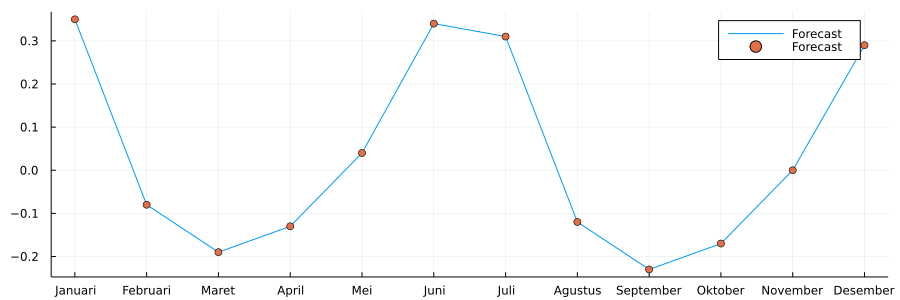

In [51]:
x=["Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember"]
plot(x, sf, label="Forecast", size=(900,300))
scatter!(x, sf, label="Forecast", size=(900,300))

In [52]:
describe(sf)

Summary Stats:
Length:         12
Missing Count:  0
Mean:           0.034167
Minimum:        -0.230000
1st Quartile:   -0.140000
Median:         -0.040000
3rd Quartile:   0.295000
Maximum:        0.350000
Type:           Float64
